### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [3]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


### Combine the DataFrames

In [4]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([intc, hd, jnj, amd, mu, nvda, tsm], axis="columns", join="inner")
combined_df

,INTC,HD,JNJ,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,45.17,191.62,66.9700,27.32,38.51,162.04,41.9700
5/13/19,44.76,190.34,66.4900,26.24,37.38,158.45,40.9900
5/10/19,46.20,194.58,67.2200,27.96,38.94,168.82,42.8300
5/9/19,46.62,194.58,66.0400,27.21,39.27,170.19,43.2500
5/8/19,49.24,195.17,66.0200,27.09,39.75,173.92,43.7000
...,...,...,...,...,...,...,...
5/20/09,15.58,23.83,12.3299,4.50,4.80,9.73,10.4677
5/19/09,15.65,24.63,12.3875,4.39,4.85,9.45,10.5871
5/18/09,15.52,26.02,12.1925,4.14,4.68,9.27,10.4975


### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_return = combined_df.pct_change()
daily_return.head()

,INTC,HD,JNJ,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.009077,-0.006680,-0.007167,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.032172,0.022276,0.010979,0.065549,0.041734,0.065447,0.044889
5/9/19,0.009091,0.000000,-0.017554,-0.026824,0.008475,0.008115,0.009806
5/8/19,0.056199,0.003032,-0.000303,-0.004410,0.012223,0.021917,0.010405


### Calculate Correlation

In [6]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_return.corr()
correlation

,INTC,HD,JNJ,AMD,MU,NVDA,TSM
INTC,1.000000,0.429047,0.318188,0.385877,0.511066,0.483262,0.500741
HD,0.429047,1.000000,0.329386,0.294653,0.375932,0.360918,0.393293
JNJ,0.318188,0.329386,1.000000,0.254498,0.337060,0.257717,0.317493
AMD,0.385877,0.294653,0.254498,1.000000,0.438329,0.471212,0.352482
MU,0.511066,0.375932,0.337060,0.438329,1.000000,0.517198,0.477247
NVDA,0.483262,0.360918,0.257717,0.471212,0.517198,1.000000,0.472496
TSM,0.500741,0.393293,0.317493,0.352482,0.477247,0.472496,1.000000


### Plot Correlation

<AxesSubplot:>

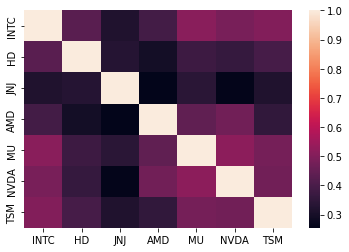

In [8]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)# vmin=-1, vmax=1)

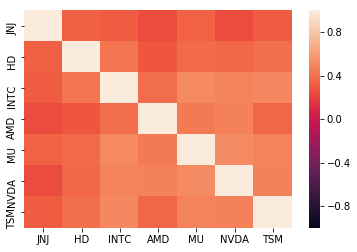

In [7]:
# Create a heatmap from the correlation values and adjust the scale


### Which semiconductor stock would be the best candidate to add to the existing portfolio?